<a href="https://colab.research.google.com/github/JessicaMishra/leaf-train/blob/master/blackpink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lisa.csv to lisa.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving jennie.csv to jennie.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving jisoo.csv to jisoo.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving rosee.csv to rosee.csv


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
img_counter=[]
img_counter.append(10)

In [ ]:
folder = 'lisa'
url_file = 'lisa.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [ ]:
folder = 'jennie'
url_file = 'jennie.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [ ]:
folder = 'rosee'
url_file = 'rosee.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [ ]:
folder = 'jisoo'
url_file = 'jisoo.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [ ]:
classes = ['lisa','jennie','rosee','jisoo']

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

lisa


jennie


rosee


jisoo


In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['jennie', 'jisoo', 'lisa', 'rosee']

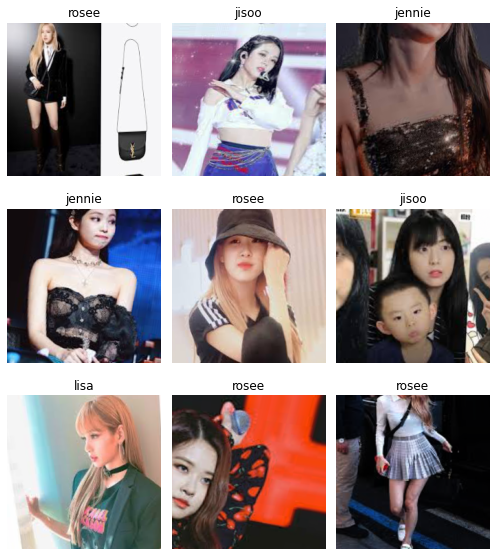

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['jennie', 'jisoo', 'lisa', 'rosee'], 4, 1375, 343)

In [ ]:
!wget -O "test2.png" "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTxv4YRz3ctx5OJ07Gajy1bZNKdSHS1-2uawA&usqp=CAU"

--2020-08-26 19:35:17--  https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTxv4YRz3ctx5OJ07Gajy1bZNKdSHS1-2uawA&usqp=CAU
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 108.177.119.139, 108.177.119.113, 108.177.119.100, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|108.177.119.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8703 (8.5K) [image/jpeg]
Saving to: ‘test2.png’

test2.png           100%[===================>]   8.50K  --.-KB/s    in 0s      

2020-08-26 19:35:17 (81.1 MB/s) - ‘test2.png’ saved [8703/8703]



In [ ]:
resnet_learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
alexnet_learn=cnn_learner(data, models.alexnet, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [ ]:
mobilenetv2_learn=cnn_learner(data, models.mobilenet_v2, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


In [ ]:
resnet_learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.179909,1.602910,0.565598,00:18
1,2.003454,2.015497,0.553936,00:18
2,1.696510,1.486314,0.495627,00:17
3,1.419054,1.312849,0.489796,00:17
4,1.195062,1.205191,0.448980,00:17
5,1.017513,1.204585,0.448980,00:17
6,0.890506,1.202627,0.431487,00:17
7,0.801232,1.199560,0.431487,00:17


In [ ]:
resnet_learn.unfreeze()

In [ ]:
resnet_learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.659175,1.169473,0.419825,00:19
1,0.723801,1.652140,0.399417,00:20
2,0.832359,2.178967,0.524781,00:19
3,0.751088,1.275797,0.381924,00:19
4,0.634849,1.071288,0.320700,00:19
5,0.500271,1.036889,0.311953,00:19
6,0.386395,1.070292,0.314869,00:19
7,0.300689,1.066621,0.335277,00:19


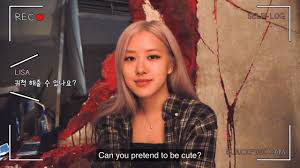

In [ ]:
test_image =open_image("test2.png")
test_image

In [ ]:
import dlib
import cv2
import os
from imutils import face_utils
from PIL import Image
face_detector = dlib.get_frontal_face_detector()   
def shape_to_list(shape):
    coords = []
    for i in range(0, 68):
        coords.append((shape.part(i).x, shape.part(i).y))
    return coords
def face_finder(image_link):
  img=cv2.imread(image_link)
  frame = img
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  rects = face_detector(gray,0)
  data=[]
  for rect in rects:
    (x1,y1,x2,y2) = face_utils.rect_to_bb(rect) 
    data.append([x1,y1,x2,y2])
  return face_cropper(image_link,data)
def face_cropper(image_link,rects):
  cropped_images=[]
  for rect in rects:
    my_image=Image.open(image_link)
    x1=rect[0]
    y1=rect[1]
    x2=rect[2]
    y2=rect[3]
    cropped_images.append(my_image.crop((x1,y1,x1+x2,y1+y2)))
  return cropped_images

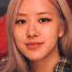

In [ ]:
test_face = face_finder("test2.png")
test_face[0].save("test_face.png")
test_face[0]

In [ ]:
my_image = open_image("test_face.png")

In [ ]:
%%time
pred_class,pred_idx,outputs = resnet_learn.predict(my_image)
print(pred_class)

rosee
CPU times: user 16.8 ms, sys: 988 µs, total: 17.8 ms
Wall time: 17.8 ms
